In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import pandas as pd



In [14]:
data_loc = r'csv\data.csv'
data = pd.read_csv(data_loc)
data.head()

,n_paths,n_points,width,height,elongation,roundness,length,area,class
0,5,883,258,104,2.466667,0.701106,621.724587,21566.0,car
1,4,596,241,70,3.408451,0.583319,580.020937,15616.5,fish
2,8,571,174,166,1.047904,0.883267,579.209087,23580.5,house
3,3,575,163,272,1.664634,0.821050,703.863135,32369.5,tree
4,5,586,212,140,1.510638,0.824155,574.167315,21621.0,bicycle


In [15]:
classes = ['car', 'fish', 'house', 'tree', 'bicycle', 'guitar', 'pencil', 'clock']
means = []
for c in classes:
    means.append(data[data['class'] == c].mean()['area'])

from pprint import pprint
pprint( { c:m for c,m in zip(classes, means) } )

{'bicycle': 33934.094117647066,
 'car': 32578.476831091182,
 'clock': 35932.76825633383,
 'fish': 24768.657544378693,
 'guitar': 32445.461595273275,
 'house': 45097.929969879515,
 'pencil': 11886.447562776993,
 'tree': 58459.36544117647}


C:\Users\Aymane\AppData\Local\Temp\ipykernel_5856\4162869048.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means.append(data[data['class'] == c].mean()['area'])


In [16]:
data.corr()

,n_paths,n_points,width,height,elongation,roundness,length,area
n_paths,1.000000,0.614895,0.245492,0.166069,-0.094200,0.139083,0.293638,0.321491
n_points,0.614895,1.000000,0.268760,0.120593,-0.035988,0.056015,0.275603,0.249937
width,0.245492,0.268760,1.000000,0.172995,-0.282560,0.206104,0.754316,0.661758
height,0.166069,0.120593,0.172995,1.000000,-0.259520,0.117367,0.739684,0.679206
elongation,-0.094200,-0.035988,-0.282560,-0.259520,1.000000,-0.557458,-0.269479,-0.357289
roundness,0.139083,0.056015,0.206104,0.117367,-0.557458,1.000000,0.245500,0.499325
length,0.293638,0.275603,0.754316,0.739684,-0.269479,0.245500,1.000000,0.920875
area,0.321491,0.249937,0.661758,0.679206,-0.357289,0.499325,0.920875,1.000000


In [17]:
data.value_counts('class').count()

8

In [36]:
classes = ['car', 'fish', 'house', 'tree', 'bicycle', 'guitar', 'pencil', 'clock']
X = data.drop( columns= ['class', 'length', 'area' ])
y = data['class']

In [37]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [38]:
scaler = StandardScaler()
#scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    random_state= 23,
    test_size= .15,
    stratify= y
)

In [40]:
knn = KNeighborsClassifier( n_neighbors =10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [41]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

c:\Users\Aymane\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Aymane\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

0.7068062827225131
0.6777777777777778


In [42]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
clf.score(X_test, y_test)

0.608641975308642

In [44]:
from sklearn.linear_model import LogisticRegression
import numpy as np
C = np.linspace(0.01, 100, 100)


In [45]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
param_grid = {
    'C' : C
}
grid_search = GridSearchCV(model, param_grid, cv= 5)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+0...
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])})

In [46]:
best_model = grid_search.best_estimator_

In [47]:
best_model.score(X, y)

0.6657397107897665

In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model = SVC()
param_grid = {
    'C' : [0.001, .01, .1, 1 , 10, 100, 1000],
    'kernel' : ['linear', 'rbf', 'poly'],
    'gamma' : [.0001, .001, .01, 1, 10],
    'class_weight' : [None, 'balanced'],
    'probability' : [False, True]
}

search_grid = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+0...
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])})

In [49]:
grid_search.score(X, y)

0.6657397107897665

c:\Users\Aymane\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Aymane\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

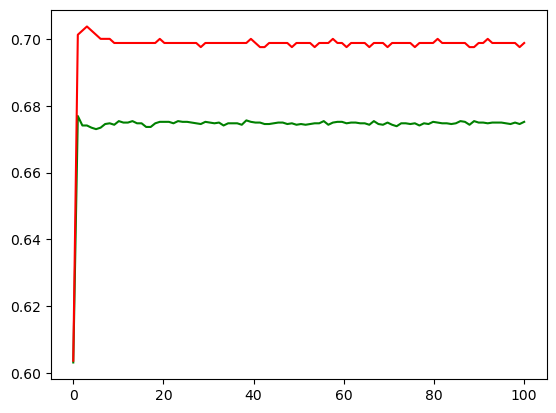

In [107]:
test_acc = []
train_acc = []
for c in C:
    lg = LogisticRegression(C=c)
    lg.fit(X_train, y_train)
    train_acc.append(lg.score(X_train, y_train))
    test_acc.append(lg.score(X_test, y_test))

from matplotlib import pyplot as plt
plt.plot(C, train_acc, c='g')
plt.plot(C, test_acc, c='r')
plt.show()

In [50]:
# Importer les bibliothèques nécessaires
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de Régression Logistique
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
print("Régression Logistique Score:", model.score(X_test, y_test))

# Modèle k-Nearest Neighbors (k-NN)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print("k-NN Score:", model.score(X_test, y_test))

# Modèle SVM (Support Vector Machine)
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
print("SVM Score:", model.score(X_test, y_test))
print("SVM Score:", model.score(X_train, y_train))

# Modèle Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
print("Random Forest Score:", model.score(X_test, y_test))

# Modèle Gradient Boosting (XGBoost, LightGBM, CatBoost)
""" from xgboost import XGBClassifier """
""" model = XGBClassifier() """
""" model.fit(X_train, y_train) """
""" print("XGBoost Score:", model.score(X_test, y_test)) """

# Autres modèles de classification peuvent être ajoutés de manière similaire


Régression Logistique Score: 0.6679012345679012
k-NN Score: 0.6555555555555556


c:\Users\Aymane\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


SVM Score: 0.7012345679012346
SVM Score: 0.7087696335078534
Random Forest Score: 0.7


' print("XGBoost Score:", model.score(X_test, y_test)) '

In [51]:
# Modèle Naive Bayes (NaiveBayes)
""" from sklearn.naive_bayes import MultinomialNB """
""" model = MultinomialNB() """
""" model.fit(X_train, y_train) """
""" print("Naive Bayes Score:", model.score(X_test, y_test)) """

# Modèle de Machine à Vecteurs de Support (SVM) avec noyau linéaire
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(X_train, y_train)
print("LinearSVC Score:", model.score(X_test, y_test))

# Modèle de Machine à Vecteurs de Support (SVM) avec noyau gaussien (RBF)
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
print("SVM with RBF Kernel Score:", model.score(X_test, y_test))

# Modèle de Réseaux de Neurones Artificiels (ANN) avec scikit-learn
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(X_train, y_train)
print("Neural Network Score:", model.score(X_test, y_test))


c:\Users\Aymane\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC Score: 0.6074074074074074
SVM with RBF Kernel Score: 0.7012345679012346
Neural Network Score: 0.7049382716049383


c:\Users\Aymane\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
model = MLPClassifier(random_state=61)
param_grid = {
    'random_state': np.random.randint(0,100, 10) #62
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X, y)
grid_search.score(X_test, y_test)

c:\Users\Aymane\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Aymane\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Aymane\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Aymane\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Aymane\anaconda3\lib\site-packages\sklearn\neural_network\_

0.7209876543209877

In [53]:
print(grid_search.predict(X[:10]))
print(y[:10])
print(label_encoder.inverse_transform(y[:10]))
print(label_encoder.inverse_transform(grid_search.predict(X[:10])))

[1 3 5 7 3 4 6 2 1 3]
[1 3 5 7 0 4 6 2 1 3]
['car' 'fish' 'house' 'tree' 'bicycle' 'guitar' 'pencil' 'clock' 'car'
 'fish']
['car' 'fish' 'house' 'tree' 'fish' 'guitar' 'pencil' 'clock' 'car' 'fish']


<AxesSubplot:>

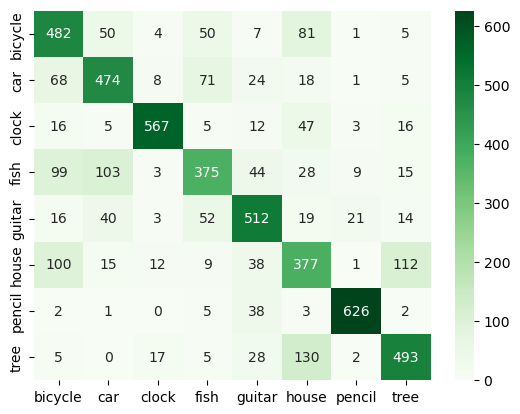

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = grid_search.predict(X)
confusion = confusion_matrix( y, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)


In [61]:
y_pred

array([1, 3, 5, ..., 6, 6, 2])